In [2]:
import json
from pprint import pprint

In [12]:
import pandas as pd

In [3]:
with open('data/recipes.json') as f:
    recipes = json.load(f) # десериализация 

In [4]:
pprint(recipes)

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

In [5]:
recipes[0]['id'] # id первого блюда

10259

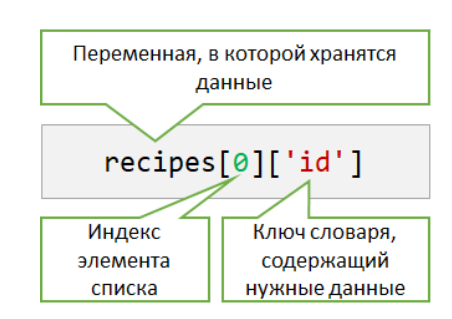

Сколько ингредиентов входят в состав первого блюда из предлагаемого списка?

In [6]:
len(recipes[0]['ingredients'])

9

К какой кухне относится блюдо с id = 13121?

In [7]:
for recipe in recipes: # начинаем перебор всех блюд входящих в список
    if recipe['id'] == 13121: # если id текущего блюда равен заданному для поиска
        print(recipe['cuisine']) # выводим на экран наименование кухни, к которой относится блюдо
        break # прерываем выполнение цикла, т.к. нужное блюдо найдено

thai


Какое количество уникальных национальных кухонь присутствуют в нашем наборе данных?

In [8]:
# Используя список        

cuisines = [] # создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes: # начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # добавляем его к списку cuisines
len(cuisines) # Выводим на экран полученное значение

20

In [9]:
# Используя множество

cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    cuisines.add(recipe['cuisine']) # добавляем название типа кухни к множеству
len(cuisines) # Выводим на экран полученное значение

20

Какой из национальных кухонь принадлежит самое большое количество рецептов?

In [10]:
cuisines = [] # Создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes: # Начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # Если тип кухни текущего
        # блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # Добавляем его к списку cuisines
valreccuisine = {} # Создаём пустой словарь для хранения информацииоб
# количествах рецептов в каждой кухне
for item in cuisines: # Перебираем список кухонь
    valreccuisine[item] = 0 # Добавляем в словарь ключ, соответствующий
    # очередной кухне
for recipe in recipes: # Перебираем список рецептов
    valreccuisine[recipe['cuisine']] += 1 # Увеличиваем значение нужного ключа в словаре на 1
            
print(max(valreccuisine, key=valreccuisine.get)) # Извлекаем значения для
# всех ключей используя метод get(), выбираем самое максимальное значение
# (при наличии одинаковых значений будет выбрано первое в словаре) и выводим
# на экран ключ максимального значения

italian


Поскольку структура всех вложенных словарей одинакова, мы можем создать DataFrame на основе списка, не проводя с ним никаких дополнительных манипуляций:

In [13]:
df = pd.DataFrame(recipes)
display(df.head())

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [14]:
df = pd.read_json('data/recipes.json')
display(df.head())

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [16]:
df.shape

(500, 3)

Создайте реестр уникальных ингредиентов all_ingredients, который будет использоваться на втором этапе. Какое количество уникальных ингредиентов в нашем DataFrame?

In [19]:
all_ingredients = set() 
for recipe in recipes:  
    for ingridient in recipe['ingredients']:
        all_ingredients.add(ingridient) 
len(all_ingredients) # Выводим на экран полученное значение

1318

Теперь определим функцию contains(), с помощью которой мы будем проверять наличие конкретного ингредиента ingredient_name в рецепте текущего блюда, который представлен списком ingredient_list (значение в ячейке столбца ingredients текущего рецепта).

In [21]:
def contains(ingredient_list): # Определяем имя функции и передаваемые аргументы.
    if ingredient_name in ingredient_list: # Если ингредиент есть в текущем блюде,
        return 1 # возвращаем значение 1.
    else: # Если ингредиента нет в текущем блюде,
        return 0 # возвращаем значение 0.

 Осталось лишь перебрать все ингредиенты из ранее созданного реестра all_ingredients с помощью цикла  for  и создать в DataFrame столбец с соответствующим названием, заполнив его единицами и нулями. Для этого применим к DataFrame, а точнее, к столбцу ingredients функцию contains().

In [25]:
for ingredient_name in all_ingredients: # Последовательно перебираем ингредиенты в реестре all_ingredients
    df[ingredient_name] = df['ingredients'].apply(contains) # В DataFrame cоздаём столбец с именем текущего ингредиента и заполняем его единицами и нулями, используя ранее созданную функцию contains.
display(df.head(2))

,id,cuisine,ingredients,meat bones,extra firm tofu,giardiniera,frozen peas and carrots,whole milk,feta cheese crumbles,ice,...,almond extract,vanilla lowfat yogurt,shredded cabbage,steak,pork ribs,beef steak,passata,sambal ulek,arrowroot powder,shredded cheese
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


изменим значение столбца ingredients — вместо списка ингредиентов в каждом рецепте заполним столбец данными о количестве ингредиентов в нём:

In [26]:
df['ingredients'] = df['ingredients'].apply(len) # Заменяем список ингредиентов в рецепте на их количество 
display(df) # Выводим содержимое полученного DataFrame на экран

,id,cuisine,ingredients,meat bones,extra firm tofu,giardiniera,frozen peas and carrots,whole milk,feta cheese crumbles,ice,...,almond extract,vanilla lowfat yogurt,shredded cabbage,steak,pork ribs,beef steak,passata,sambal ulek,arrowroot powder,shredded cheese
0,10259,greek,9,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1121,chinese,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,18376,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,17815,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,32878,southern_us,19,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.to_csv('data/recipes.csv', index = False)

Напишите код для создания списка ids всех блюд, представленных в датафрейме. Нужны только уникальные значения.

Порядок id должен совпадать с тем, как они расположены в исходном датафрейме.

Примечание. Не забудьте импортировать библиотеки и прочитать файл recipes.csv.

In [31]:
ids = [] # создаём пустой список для хранения уникальных значений id
for recipe in recipes: # начинаем перебор всех рецептов
    if not(recipe['id'] in ids): # если тип кухни текущего блюда ещё не встречался
        ids.append(recipe['id']) # добавляем его к списку cuisines
print(ids)

[10259, 25693, 20130, 22213, 13162, 6602, 42779, 3735, 16903, 12734, 5875, 45887, 2698, 41995, 31908, 24717, 34466, 1420, 2941, 8152, 13121, 40523, 40989, 29630, 49136, 26705, 27976, 22087, 9197, 1299, 40429, 34419, 10276, 33465, 39250, 37963, 20051, 11300, 17610, 37405, 28302, 31634, 32304, 36341, 29369, 27564, 18515, 3335, 4499, 4906, 5767, 30748, 35930, 44902, 31119, 3535, 47028, 38112, 2646, 5206, 38233, 39267, 11913, 20591, 70, 43928, 8530, 275, 43769, 49111, 11886, 45839, 699, 24568, 8820, 16582, 9058, 4715, 29061, 2107, 22825, 13758, 6886, 14874, 43399, 38254, 41596, 33989, 17004, 4969, 31831, 46648, 36888, 34471, 25164, 39600, 46357, 46905, 8753, 37337, 17636, 8997, 28851, 4635, 7782, 8031, 49434, 31318, 31027, 47095, 4574, 19757, 35570, 44812, 27858, 18624, 9406, 35132, 33071, 8321, 20955, 45776, 6043, 336, 25751, 793, 34367, 7406, 7473, 7532, 5924, 5802, 41078, 20665, 39471, 9595, 27869, 44776, 17771, 43970, 27165, 11190, 21872, 29853, 1154, 9069, 46975, 4892, 21467, 20919, 4